In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
data = uproot.open('data/ttjjresult.root')

In [3]:
events = data['mytree']

In [4]:
events.keys()

['nbtag', 'njet', 'ht', 'met', 'pt5', 'pt6']

In [5]:
ht, pt6 = events.arrays(['ht', 'pt6'], library='np', how=tuple) #can also choose different variable

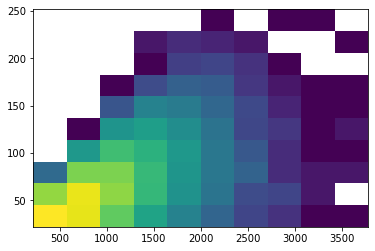

In [6]:
hist = plt.hist2d(ht, pt6, norm=colors.LogNorm()) #ht and pt6 are highly correlated

In [7]:
htcut = [700, 2000] #define region of interest
ptcut = [40, 100]

total_region = (ht>htcut[0])&(ht<htcut[1])&(pt6>ptcut[0])&(pt6<ptcut[1])

htbin = np.linspace(*htcut, 14) #define appropriate bin size
ptbin = np.linspace(*ptcut, 19)

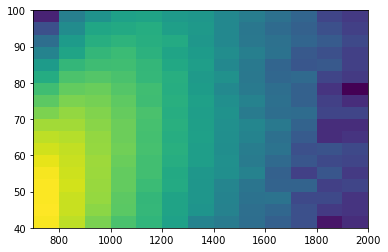

In [10]:
htpt = plt.hist2d(ht[total_region], pt6[total_region], norm=colors.LogNorm(), bins=[htbin,ptbin])

In [11]:
np.save('data/htpt_fine_40to100', htpt[0]) #save histogram